In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("C:/Users/sanke/Downloads/city_day.csv/city_day.csv")

In [11]:
df.info()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


<bound method NDFrame.describe of                 City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  

## Data Cleaning

In [16]:
# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing Date
df = df.dropna(subset=['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# List of pollutant columns
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']

# Interpolate missing values using time-based interpolation
df[pollutants] = df[pollutants].interpolate(method='time')

# Optional: reset index if needed
df.reset_index(inplace=True)

# Check
print(df.head())

        Date       City  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0 2015-01-01  Ahmedabad    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1 2015-01-02  Ahmedabad    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2 2015-01-03  Ahmedabad    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3 2015-01-04  Ahmedabad    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4 2015-01-05  Ahmedabad    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


## Select Relevant variables

In [19]:
# Keep only useful columns for AQI trend analysis
df_aqi = df[['City','Date','PM2.5','PM10','CO','NO2','SO2','O3','AQI','AQI_Bucket']]


## Visualize AQI Trend Over Time

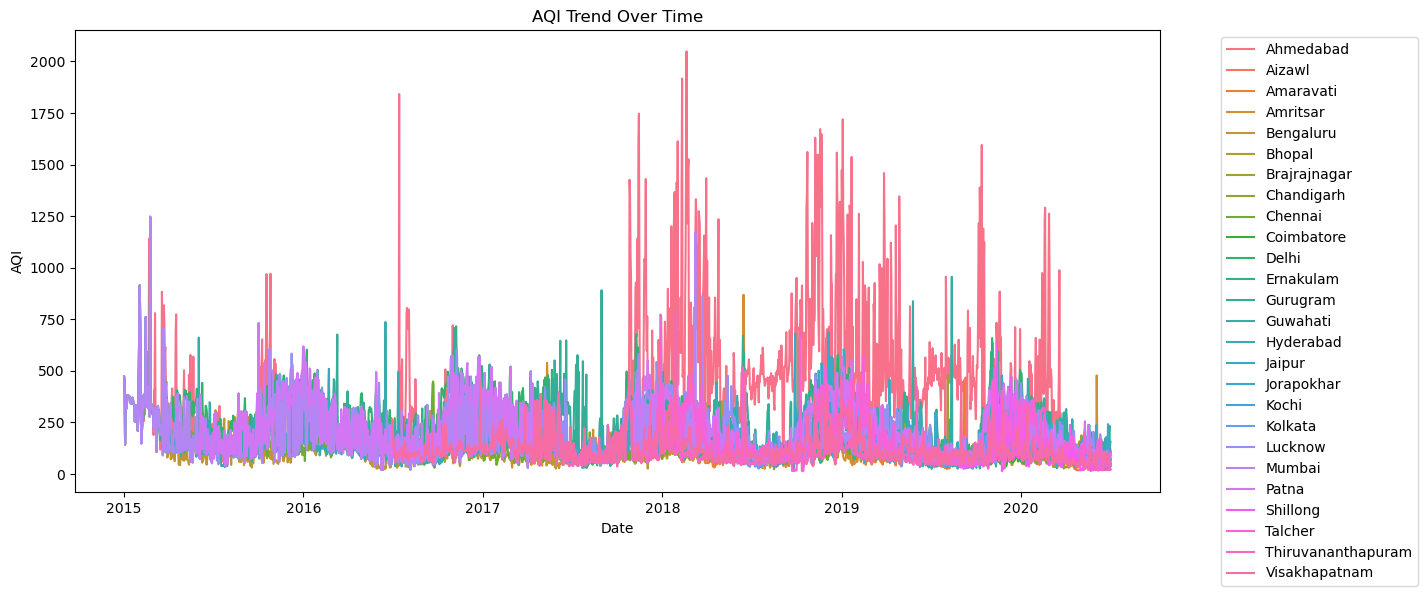

In [22]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df_aqi, x='Date', y='AQI', hue='City')
plt.title("AQI Trend Over Time")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Plot Individual Pollutant Trends

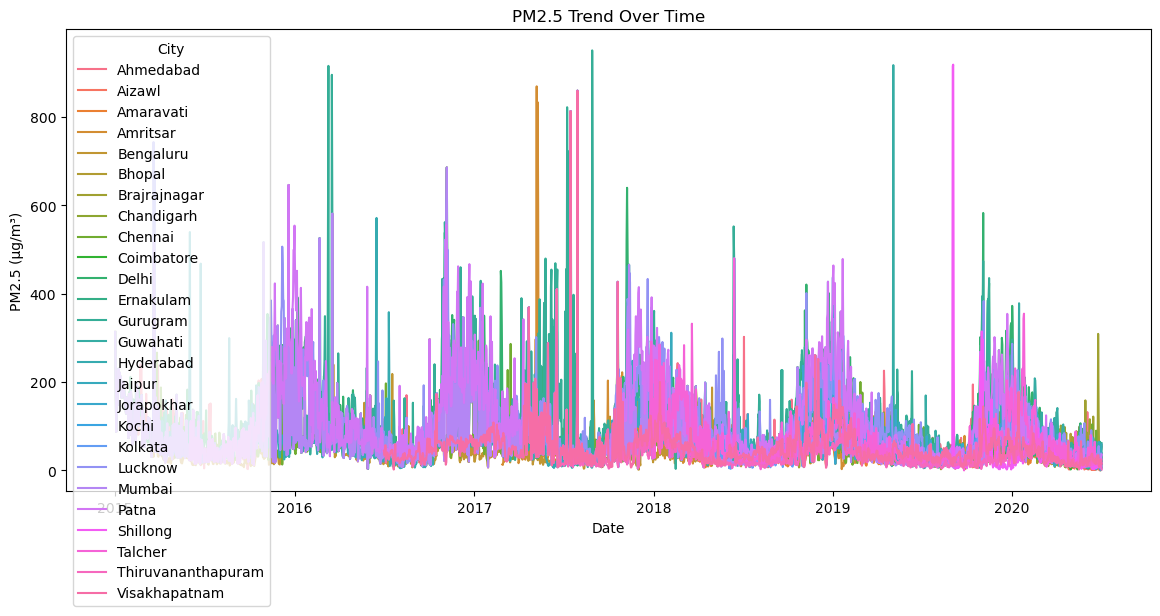

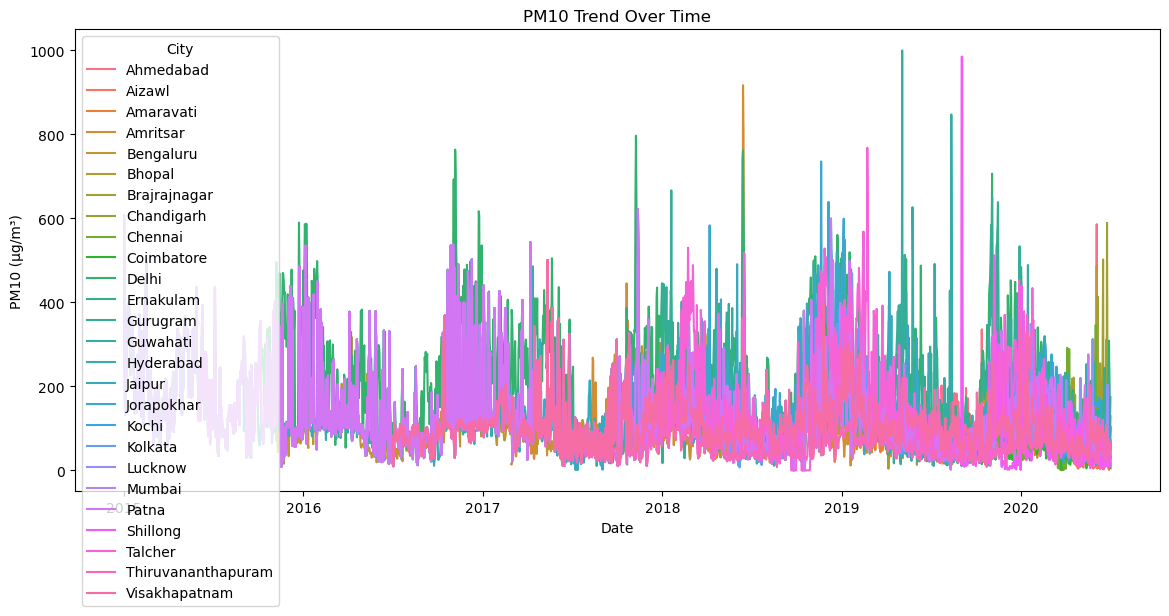

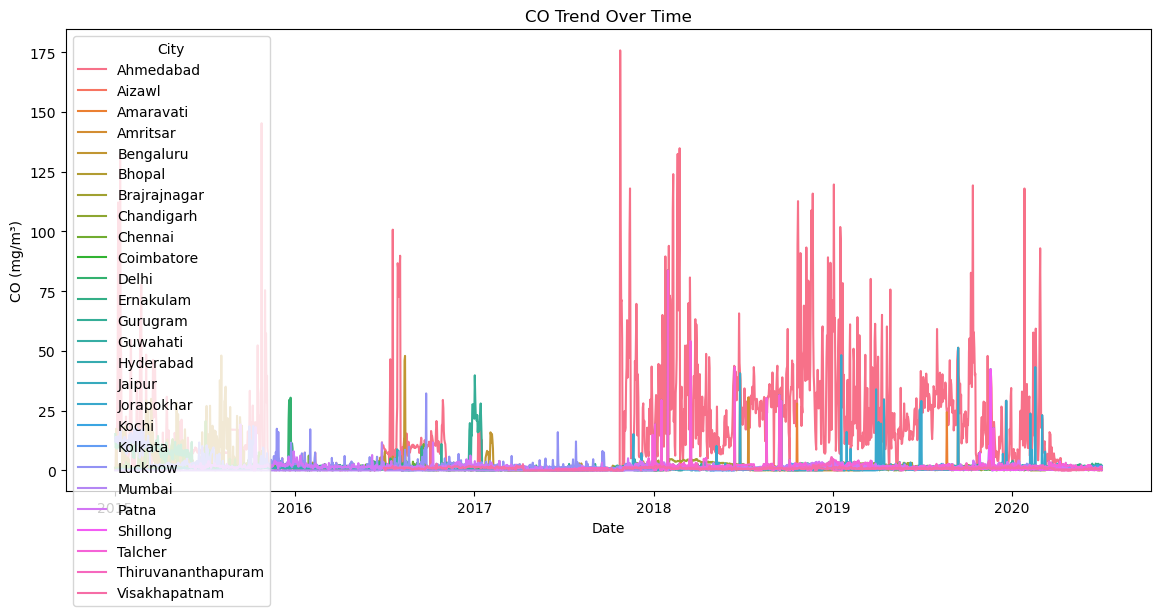

In [25]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df_aqi, x='Date', y='PM2.5', hue='City')
plt.title("PM2.5 Trend Over Time")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

plt.figure(figsize=(14,6))
sns.lineplot(data=df_aqi, x='Date', y='PM10', hue='City')
plt.title("PM10 Trend Over Time")
plt.xlabel("Date")
plt.ylabel("PM10 (µg/m³)")
plt.show()

plt.figure(figsize=(14,6))
sns.lineplot(data=df_aqi, x='Date', y='CO', hue='City')
plt.title("CO Trend Over Time")
plt.xlabel("Date")
plt.ylabel("CO (mg/m³)")
plt.show()


## Compare AQI Across Dates (Bar Plot)

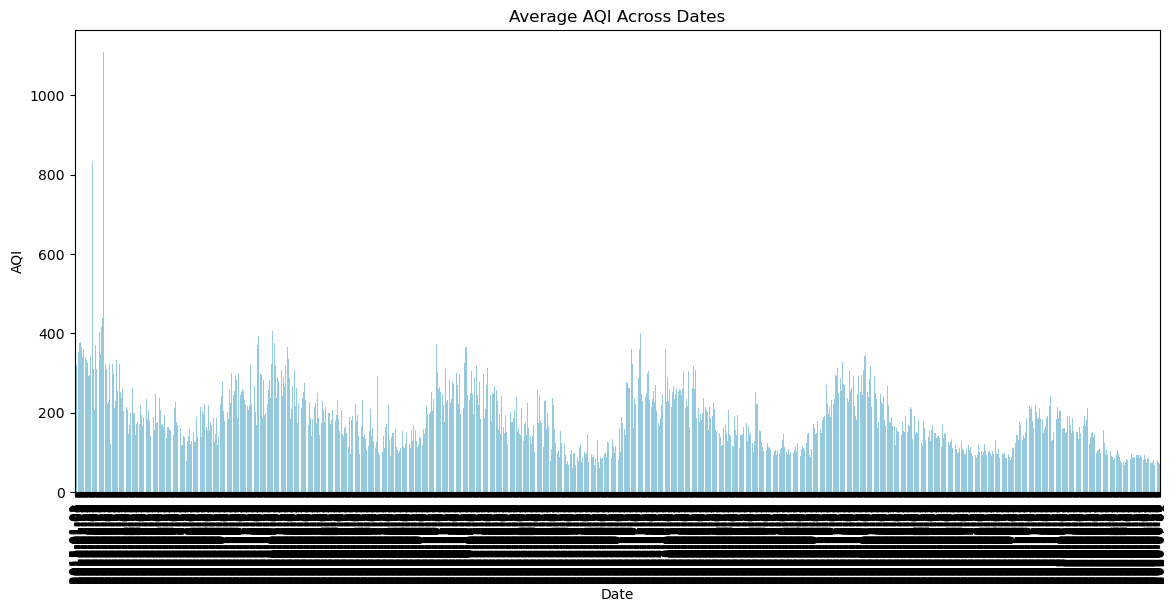

In [29]:
# Aggregate AQI by date
aqi_by_date = df_aqi.groupby('Date')['AQI'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=aqi_by_date, x='Date', y='AQI', color='skyblue')
plt.xticks(rotation=90)
plt.title("Average AQI Across Dates")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.show()


## Distribution of AQI Values (Box/Violin Plot)

C:\Users\sanke\AppData\Local\Temp\ipykernel_8436\55980055.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_aqi, x='AQI_Bucket', y='AQI', palette='Set2')


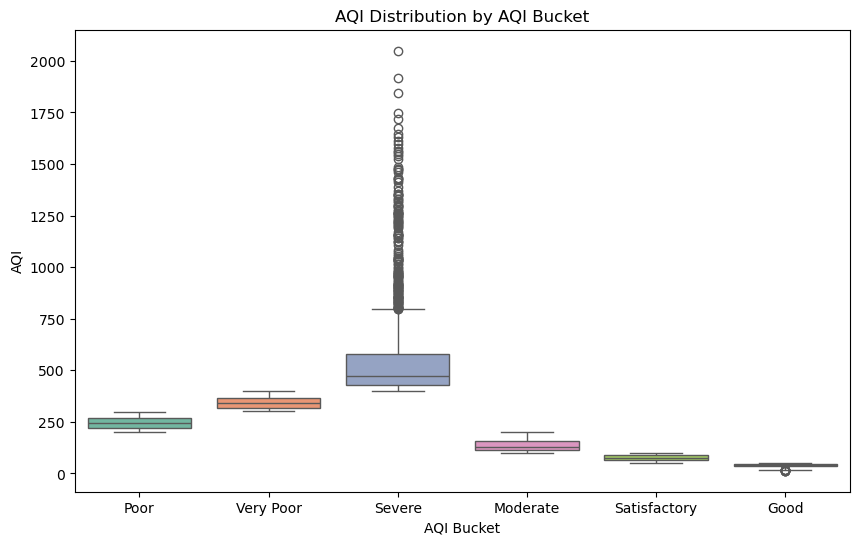

C:\Users\sanke\AppData\Local\Temp\ipykernel_8436\55980055.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_aqi, x='AQI_Bucket', y='AQI', palette='Set3')


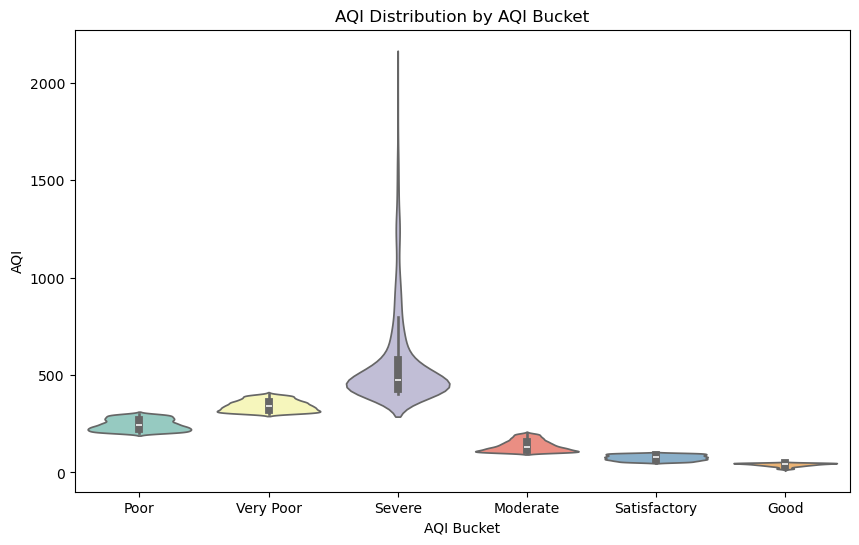

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_aqi, x='AQI_Bucket', y='AQI', palette='Set2')
plt.title("AQI Distribution by AQI Bucket")
plt.xlabel("AQI Bucket")
plt.ylabel("AQI")
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(data=df_aqi, x='AQI_Bucket', y='AQI', palette='Set3')
plt.title("AQI Distribution by AQI Bucket")
plt.xlabel("AQI Bucket")
plt.ylabel("AQI")
plt.show()


## Scatter Plots for AQI vs Pollutants

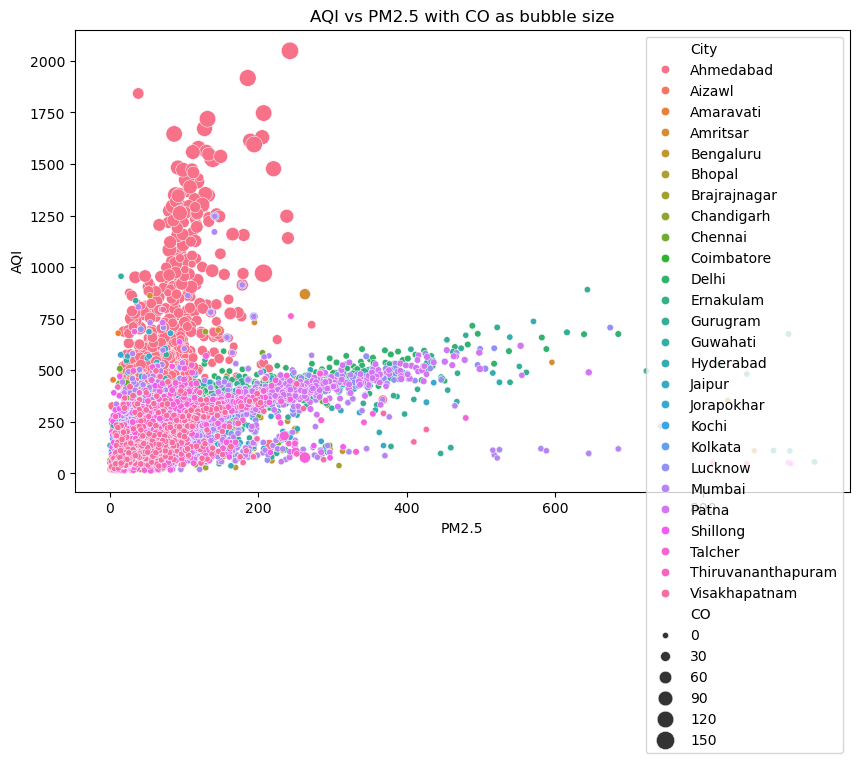

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_aqi, x='PM2.5', y='AQI', hue='City', size='CO', sizes=(20,200))
plt.title("AQI vs PM2.5 with CO as bubble size")
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.show()
